<a href="https://colab.research.google.com/github/SeshuKanda/DL-_Lab/blob/main/exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


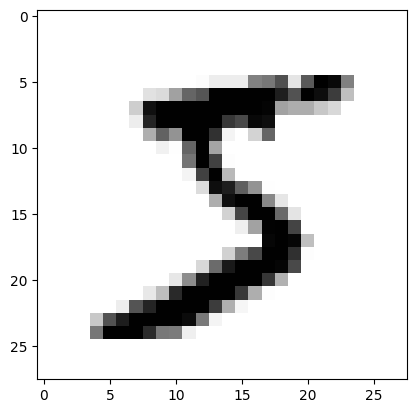

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,914 (796.54 KB)

 Trainable params: 203,914 (796.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 115s 60ms/step - accuracy: 0.8177 - loss: 0.5522 - val_accuracy: 0.9866 - val_loss: 0.0429
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 47ms/step - accuracy: 0.9695 - loss: 0.1026 - val_accuracy: 0.9888 - val_loss: 0.0340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 46ms/step - accuracy: 0.9799 - loss: 0.0662 - val_accuracy: 0.9917 - val_loss: 0.0269
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 44ms/step - accuracy: 0.9830 - loss: 0.0573 - val_accuracy: 0.9918 - val_loss: 0.0299
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9861 - loss: 0.0483 - val_accuracy: 0.9922 - val_loss: 0.0266
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9897 - loss: 0.0344
Test accuracy: 0.9922000169754028


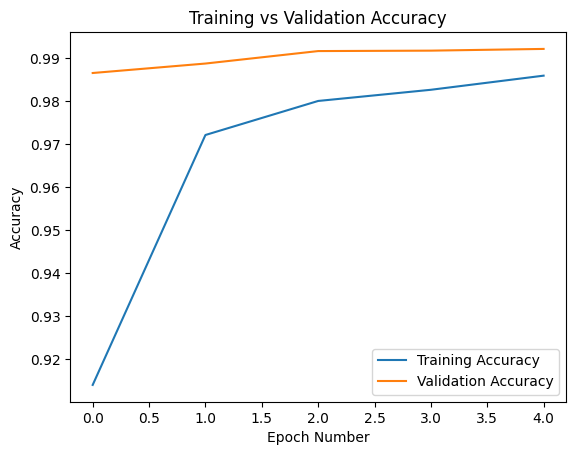

In [34]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset shapes
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Image dimensions
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

# Display the first image in the training set
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Expand dimensions to include the channel dimension (for grayscale, the channel size is 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu',
                 input_shape=(28, 28, 1), padding="valid", name="Conv1"))
# Max Pooling Layer 1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="Pool1"))

# Convolutional Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu',
                 padding="same", name="Conv2"))
# Max Pooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="Pool2"))

# Convolutional Layer 3
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu',
                 padding="same", name="Conv3"))

# Flatten Layer
model.add(Flatten(name="Flatten"))

# Fully Connected Layer
model.add(Dense(64, activation='relu', name="Dense1"))

# Dropout Layer (for regularization)
model.add(Dropout(0.5, name="Dropout"))

# Output Layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax', name="Output"))

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()